In [38]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data_3_2.csv', header = None, names = ['x','y'])
df

,x,y
0,-100,-99.654180
1,-99,-101.279309
2,-98,-99.802971
3,-97,-96.564074
4,-96,-91.476430
...,...,...
196,96,96.975428
197,97,96.341406
198,98,97.532064
199,99,97.603274


Slope: 1.004433013783065 Intercept: -0.022123218905474445
0.9991365665272042


<Axes: >

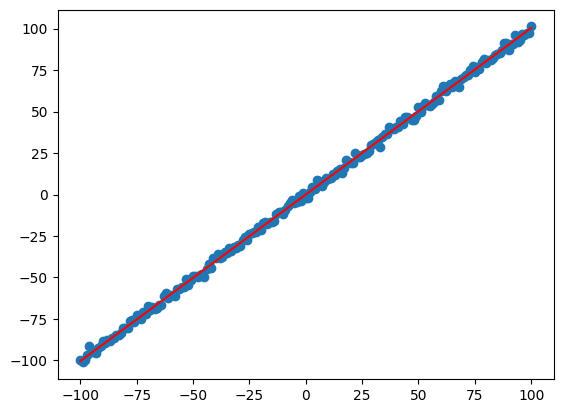

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
fig, ax = plt.subplots()
x, y = df['x'].values.reshape(-1,1) , df['y'].values
ax.scatter(x, y)
model = LinearRegression().fit(x,y)
ax.plot(x,model.predict(x), color = 'r')
slope, intercept = model.coef_[0], model.intercept_
print(f'Slope: {slope} Intercept: {intercept}')
r2 = r2_score(y,model.predict(x))
print(r2)
ax

Moviepy - Building video test.mp4.
Moviepy - Writing video test.mp4



Moviepy - Done !
Moviepy - video ready test.mp4


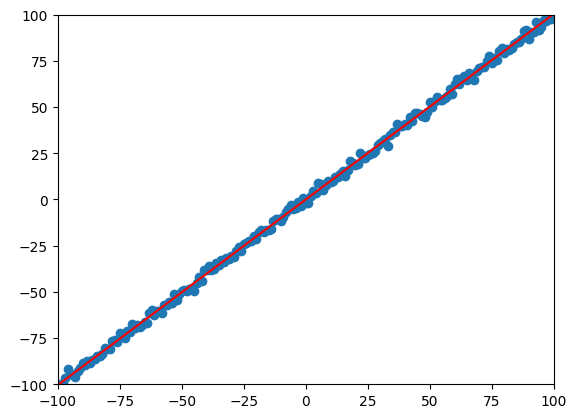

In [46]:
from moviepy.editor import VideoClip
import numpy as np
from moviepy.video.io.bindings import mplfig_to_npimage
from IPython.display import Video

duration = 2
fig, ax = plt.subplots()
model = LinearRegression()
def make_frame(t):
	ax.clear()
	ax.set_xlim(-100,100)
	ax.set_ylim(-100,100)
	frame_num = int(t*200) #Increasing t speeds up how fast the line is drawn
	ax.scatter(df['x'][:frame_num], df['y'][:frame_num])
	if frame_num > 1:
		x = df['x'][:frame_num].values.reshape(-1,1)
		y = df['y'][:frame_num].values.reshape(-1,1)
		model.fit(x,y)
		y_vals = model.predict(x)
		ax.plot(x,y_vals,color = 'red')
	return mplfig_to_npimage(fig)



# fig, ax = plt.subplots()
# def make_frame(t):
#     ax.clear()
#     ax.plot(x, np.sinc(x**2) + np.sin(x + 2*np.pi/duration * t), lw=3)
#     ax.set_ylim(-1.5, 2.5)
#     return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration = duration)
animation.write_videofile('test.mp4', fps = 200)
Video('test.mp4', embed = True)
#animation.ipython_display(fps = 200, loop = True, autoplay = True) #Directly generate and display in notebook